### Importing the basic necessary libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

### Directories of training and testing datasets are specified

In [2]:
train_dir="../data/sign_mnist_train/sign_mnist_train.csv"
test_dir="../data/sign_mnist_test/sign_mnist_test.csv"

In [3]:
train_ds=pd.read_csv(train_dir)
test_ds=pd.read_csv(test_dir)

In [13]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [4]:
train_ds.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [23]:
train_ds.shape

(27455, 785)

## Visualizing Frequency Distribution of Labels from training data

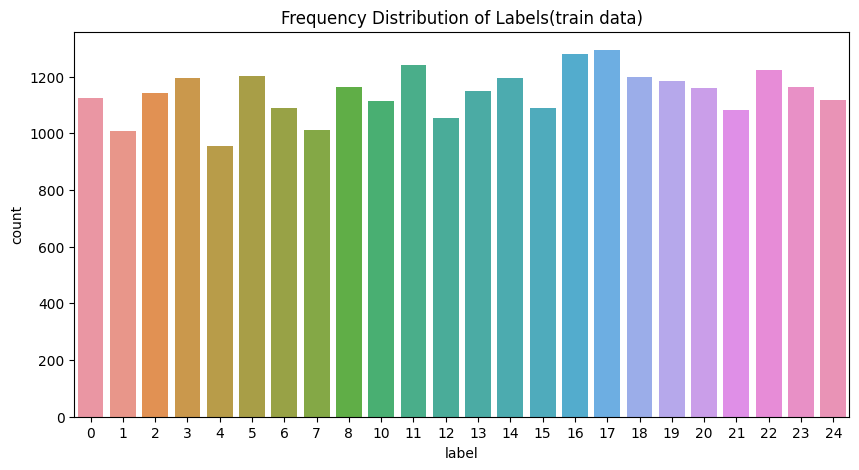

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_ds,x='label')
plt.title("Frequency Distribution of Labels(train data)")
plt.show()

## Visualizing Frequency Distribution of Labels from testing data

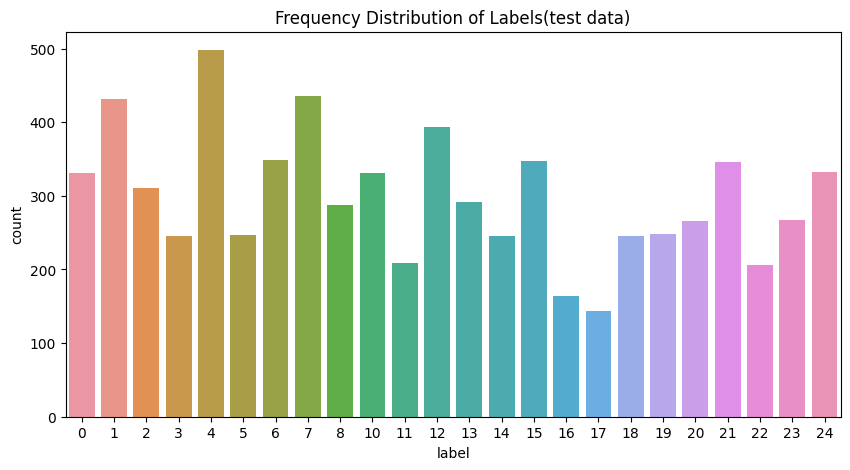

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=test_ds,x='label')
plt.title("Frequency Distribution of Labels(test data)")
plt.show()

In [7]:
train_ds['label'].value_counts()

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64

### Creating the training datasets

In [17]:
X_train=train_ds.iloc[:,1:].values
y_train=train_ds.iloc[:,0].values

### Creating the testing datasets

In [30]:
X_test=test_ds.iloc[:,1:].values
y_test=test_ds.iloc[:,0].values

In [18]:
X_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [33]:
X_test

array([[149, 149, 150, ..., 112, 120, 107],
       [126, 128, 131, ..., 184, 182, 180],
       [ 85,  88,  92, ..., 225, 224, 222],
       ...,
       [190, 191, 190, ..., 211, 209, 208],
       [201, 205, 208, ...,  67,  70,  63],
       [173, 174, 173, ..., 195, 193, 192]], dtype=int64)

## Reshaping the dataset 

In [39]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

## Visualizing the images of training dataset

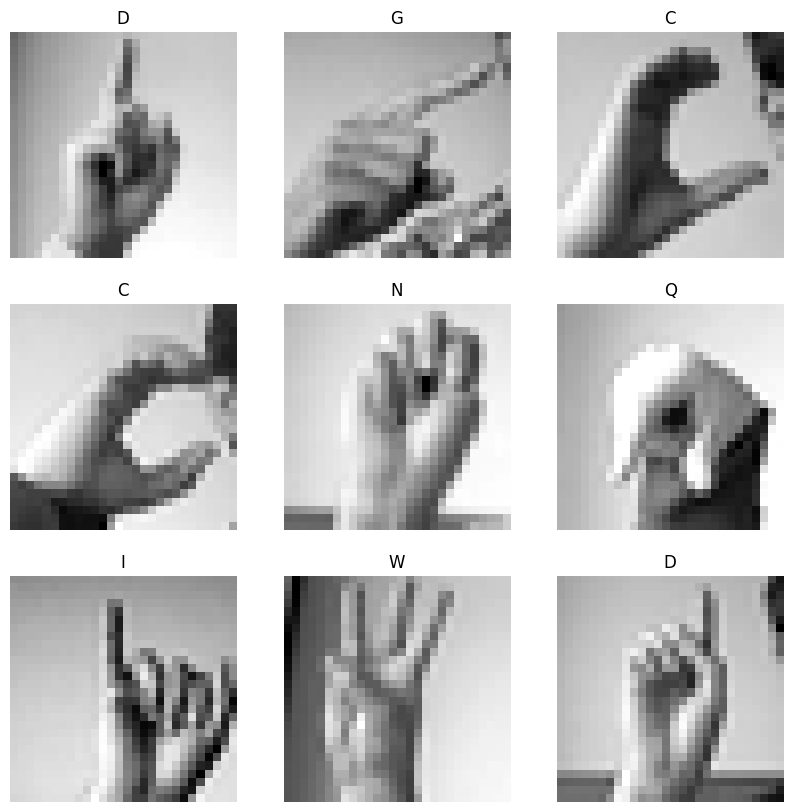

In [47]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(chr(y_train[i]+65))
    plt.axis('off')
plt.show()

### Importing necessary libraries for the CNN

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Rescaling,Conv2D,BatchNormalization,MaxPooling2D,Flatten,Dense,Dropout

## Creating the CNN model

In [54]:
model=Sequential()
model.add(InputLayer(shape=(28,28,1)))

model.add(Conv2D(32,kernel_size=(2,2),padding='same',activation='relu'))
model.add(Conv2D(32,kernel_size=(2,2),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size=(2,2),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26,activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,648,858 (6.29 MB)

 Trainable params: 1,648,666 (6.29 MB)

 Non-trainable params: 192 (768.00 B)

In [55]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Training the model for 20 epochs

In [56]:
history=model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=20,verbose=2)

Epoch 1/20
858/858 - 60s - 70ms/step - accuracy: 0.7969 - loss: 0.6829 - val_accuracy: 0.9289 - val_loss: 0.2225
Epoch 2/20
858/858 - 77s - 90ms/step - accuracy: 0.9682 - loss: 0.0983 - val_accuracy: 0.8440 - val_loss: 0.7090
Epoch 3/20
858/858 - 51s - 60ms/step - accuracy: 0.9786 - loss: 0.0703 - val_accuracy: 0.9409 - val_loss: 0.3758
Epoch 4/20
858/858 - 69s - 81ms/step - accuracy: 0.9831 - loss: 0.0610 - val_accuracy: 0.9321 - val_loss: 0.3870
Epoch 5/20
858/858 - 50s - 58ms/step - accuracy: 0.9847 - loss: 0.0595 - val_accuracy: 0.9555 - val_loss: 0.1791
Epoch 6/20
858/858 - 53s - 62ms/step - accuracy: 0.9895 - loss: 0.0430 - val_accuracy: 0.9360 - val_loss: 0.2539
Epoch 7/20
858/858 - 51s - 59ms/step - accuracy: 0.9902 - loss: 0.0390 - val_accuracy: 0.9689 - val_loss: 0.2459
Epoch 8/20
858/858 - 49s - 57ms/step - accuracy: 0.9891 - loss: 0.0489 - val_accuracy: 0.9428 - val_loss: 0.4274
Epoch 9/20
858/858 - 52s - 60ms/step - accuracy: 0.9923 - loss: 0.0359 - val_accuracy: 0.9300 - 

## Predicting the labels for test dataset

In [76]:
y_pred=model.predict(X_test,verbose=0) #y_pred contains matrix of predictions

In [78]:
yp=[]
for i in range(len(y_pred)):
    yp.append(np.argmax(y_pred[i])) #using np.argmax to identify the predicted label for each test image

## Evaluating the Results

### Confusion Matrix of True vs Predicted Label

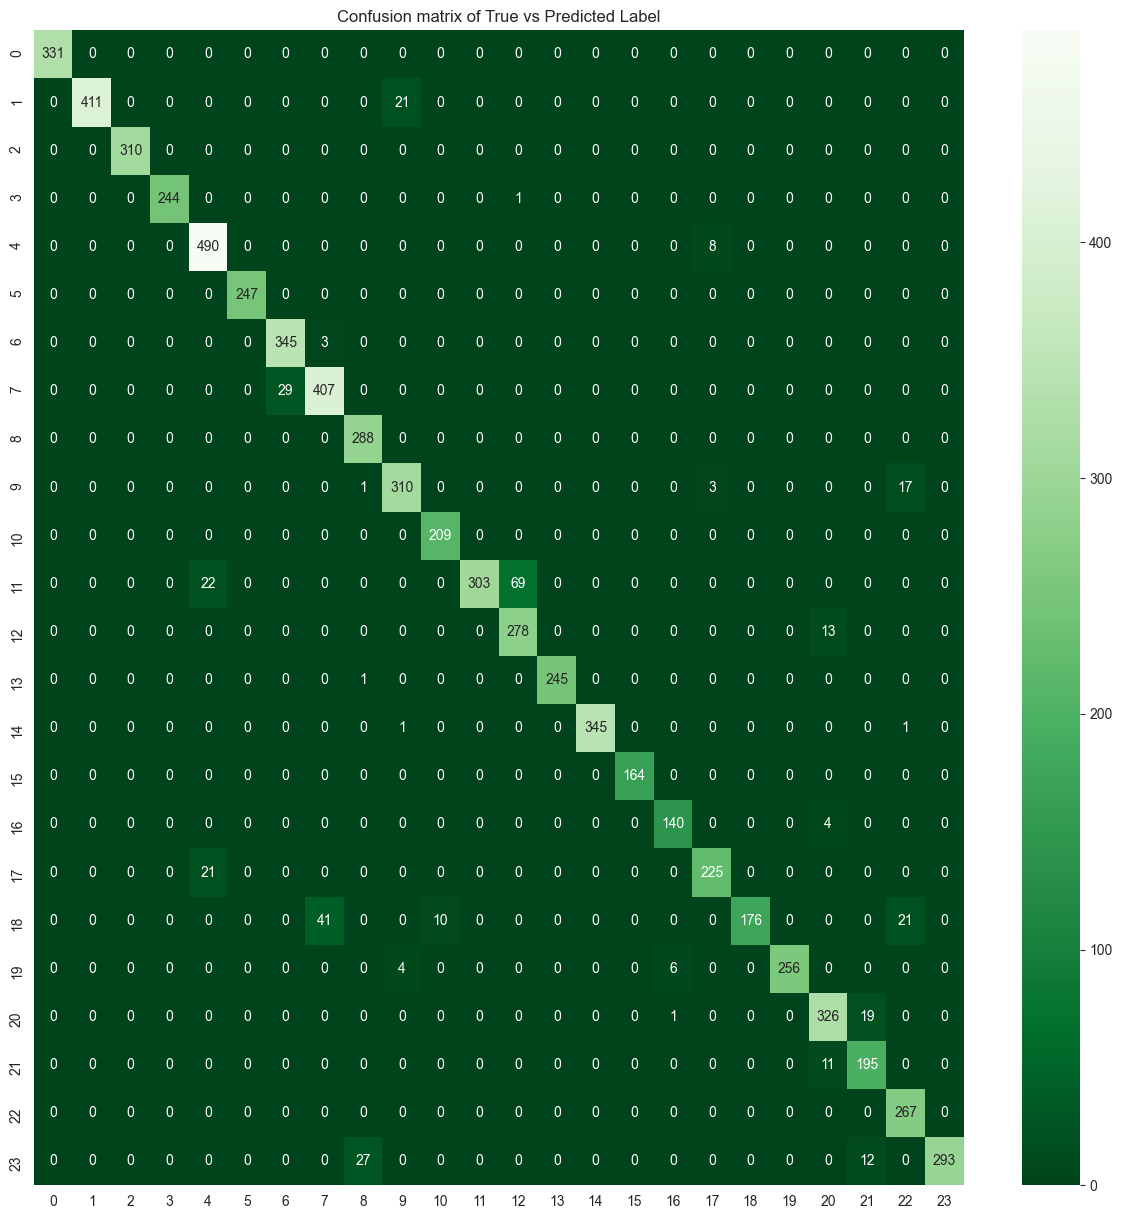

In [100]:
plt.figure(figsize=(15,15))
cm=confusion_matrix(y_test,yp)
sns.heatmap(data=cm,annot=True,fmt='',cmap='Greens_r')
plt.title("Confusion matrix of True vs Predicted Label")
plt.show()

### Train Vs Validation Accuracy and Loss

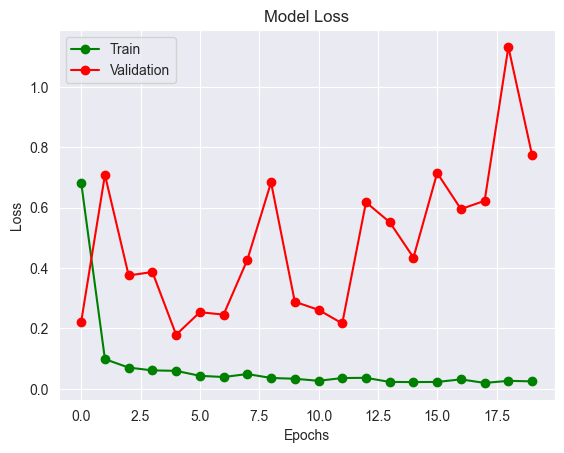

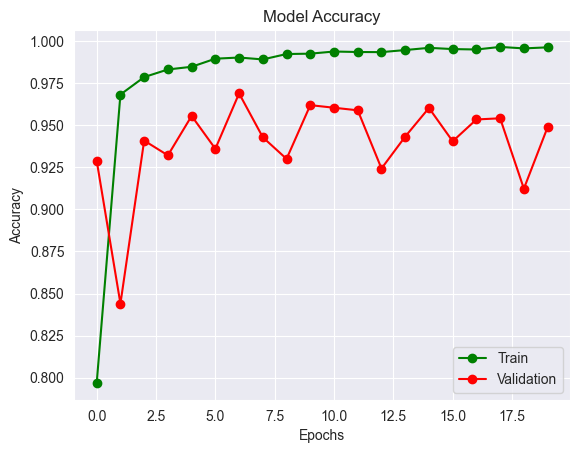

In [101]:
plt.plot(history.history['loss'],"go-")
plt.plot(history.history['val_loss'],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Validation'])
plt.show()

plt.plot(history.history['accuracy'],'go-')
plt.plot(history.history['val_accuracy'],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Validation'])
plt.show()

### Classification Report

In [102]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.95      0.98       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       0.92      0.98      0.95       498
           5       1.00      1.00      1.00       247
           6       0.92      0.99      0.96       348
           7       0.90      0.93      0.92       436
           8       0.91      1.00      0.95       288
          10       0.92      0.94      0.93       331
          11       0.95      1.00      0.98       209
          12       1.00      0.77      0.87       394
          13       0.80      0.96      0.87       291
          14       1.00      1.00      1.00       246
          15       1.00      0.99      1.00       347
          16       1.00      1.00      1.00       164
          17       0.95      0.97      0.96       144
          18       0.95    

## Visualization of Misclassified Hand Signs

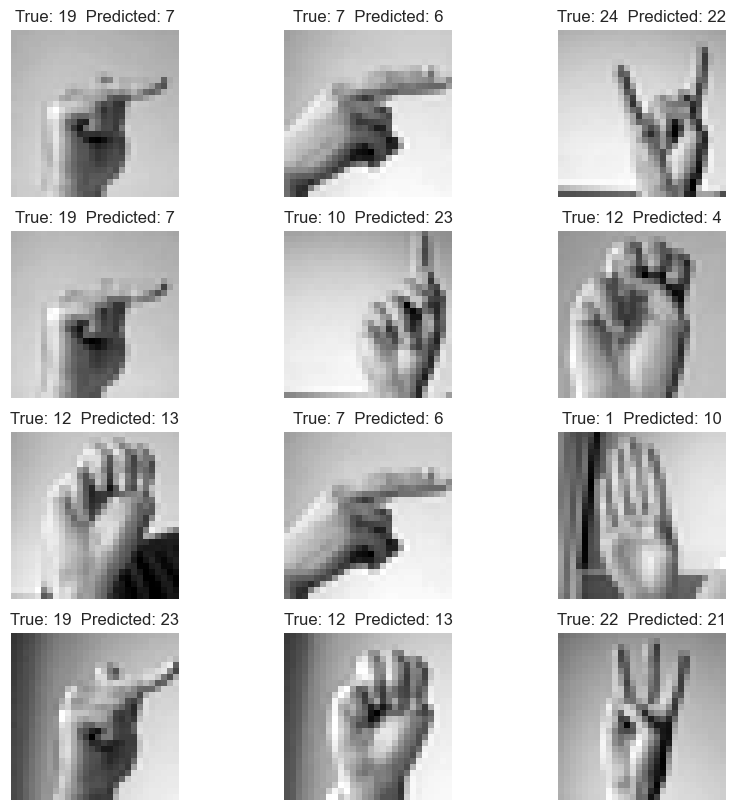

In [109]:
misclassified_indices = np.where(y_test != yp)[0]
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test[misclassified_indices[i]],cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_test[misclassified_indices[i]]}  Predicted: {yp[misclassified_indices[i]]}")
plt.show()

## Saving the Model

In [110]:
model.save("sign_language_detection_model.keras")